# Exercise: Deep Learning

Version: SoSe 2022

Estimated time needed: 60 minutes

Author: Clara Siepmann

Deadline : Friday, 15.07.2022 (11:55 p.m.)

______

# Homework

### Submission guidelines
* You can reach up to 10 homework points for every homework submission. 10 homework points correspond to one exam point.
* In the course of the semester, there will be extra bonus points (where each bonus point equals to one exam point) for the homeworks. These will be given in the form of e.g. challenges inside the homeworks. More information will be given in the corresponding homeworks.
* The submission has to be done by a team of two to four people. **Individual submissions will not be graded**. The team members do not have to attend the same exercise group. If there are any problems regarding this guideline, please reach out to a tutor.
* Please state the **name and matriculation number of all team members** in every submission **clearly**.
* Only **one team member should submit** the homework. If more than one version of the same homework is submitted by accident (submitted by more than one group member), please reach out to a tutor **as soon as possible**. Otherwise, the first submitted homework will be graded.
* The submission must be in a Jupyter Notebook format (.ipynb). Submissions in **other formats will not be graded**. If there are any problems regarding this guideline, please reach out to a tutor.
* It is not necessary to also submit the part of the exercise discussed by the tutor, please only submit the homework part.
* In case you want to insert pictures in your homework, insert them like this: Uplaod the picture to Google Drive. Right click on it. Click on "Get shareable link". Set the accessibility to "Anyone with link". Copy the link. Create a text cell where you want to insert the picture. Insert the link as follows: ``![picture description]``(insert link here, inside these brackets). Change the link as follows: From "https://drive.google.com/file/d/XXXXX/view?usp=sharing" to "https://drive.google.com/uc?id=XXXXX". XXXXX describes the individual ID, which will be in your link.

# Task 1
### 10 homework points

Your task is to develop a model that works better than the basic model. Different ideas that you can try out:
* Change the network structure, e.g. the number of nodes in the hidden layer and/or the number of hidden layers.
* Change the values of the hyper parameters, such as the learning rate.
* Change the training parameters, for example, the number of epochs.
* Experiment with callbacks which automatically deal with specific hyperparameters (e.g. EarlyStopping or ReduceLROnPlateau)
* Find out which models work best for this problem.

Note that you do not know the test data and that there is therefore a danger that you fit your model too closely to the training data. 

Please submit the following results:

* A Jupyter Notebook with your code
* A description of the configuration you submitted (also in notebook):
 * Which network structure and which hyper parameters did you use and why?
 * What other changes have you made? Why do you think your configuration is best?
* A brief discussion of the expected classification quality and how you determined it(also in notebook).

The full score for the homework is independent of the results in the challenge.

In [ ]:
import keras
import matplotlib.pyplot as plt

import numpy as np

from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
from random import randint

# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
num_classes = 10
y_train_one_hot = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test_one_hot = keras.utils.np_utils.to_categorical(y_test, num_classes)

# print first 5 labels as categorial and one-hot
for i in range(5):
    print(y_train[i], " -> ", y_train_one_hot[i])
    
# Flatten the images as we are not using CNN here
img_rows, img_cols = 28, 28
image_size = img_rows * img_cols

batch_size = 128
epochs = 10

# normalize into [0,1]
def normalize_data(x):
    x = x.astype('float32')
    x /= 255
    return x

60000 train samples
10000 test samples
5  ->  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0  ->  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4  ->  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1  ->  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
9  ->  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


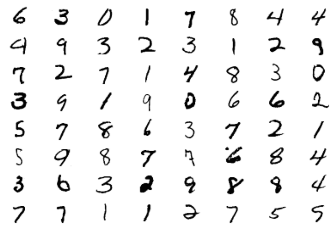

In [ ]:
%matplotlib inline 
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train[randint(0, x_train.shape[0])], cmap='Greys')
    
plt.show()

In [ ]:
def fit_model(model, xtrain, ytrain):
    history = model.fit(xtrain, ytrain,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=True,
                        validation_split=.1)
    return history
    
def evaluate_model(model, history, xtest, ytest):


    score = model.evaluate(xtest, ytest, verbose=False)

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()
 
    print("Test loss: ", score[0])
    print("Test accuracy: ", score[1])

Original shape:  (60000, 28, 28)
After flattening:  (60000, 784)
Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 1.5453 - acc: 0.5383 - val_loss: 0.7085 - val_acc: 0.8555
Epoch 2/10
422/422 [==============================] - 2s 6ms/step - loss: 0.7535 - acc: 0.7756 - val_loss: 0.4170 - val_acc: 0.8972
Epoch 3/10
422/422 [==============================] - 3s 7ms/step - loss: 0.5747 - acc: 0.8287 - val_loss: 0.3357 - val_acc: 0.9098
Epoch 4/10
422/422 [==============================] - 3s 7ms/step - loss: 0.4942 - acc: 0.8539 - val_loss: 0.2927 - val_acc: 0.9197
Epoch 5/10
422/422 [==============================] - 2s 6ms/step - loss: 0.4459 - acc: 0.8686 - val_loss: 0.2662 - val_acc: 0.9258
Epoch 6/10
422/422 [==============================] - 2s 6ms/step - loss: 0.4081 - acc: 0.8798 - val_loss: 0.2460 - val_acc: 0.9310
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3828 - acc: 0.8870 - val_loss: 0.2307 - val_acc: 0.9337
Epoch 8/10


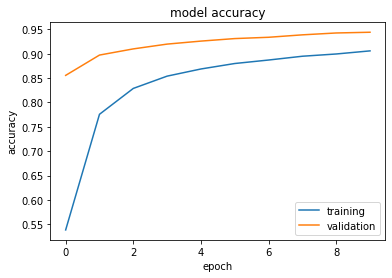

Test loss:  0.2315862476825714
Test accuracy:  0.9329000115394592


In [ ]:
print("Original shape: ", x_train.shape)
x_train_reshaped = x_train.reshape(x_train.shape[0], image_size)
x_test_reshaped = x_test.reshape(x_test.shape[0], image_size)
print("After flattening: ", x_train_reshaped.shape)

x_train_reshaped = normalize_data(x_train_reshaped)
x_test_reshaped = normalize_data(x_test_reshaped)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(image_size,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics=['acc'])

history = fit_model(model, x_train_reshaped, y_train_one_hot)
evaluate_model(model, history, x_test_reshaped, y_test_one_hot)

**Add your description and explanation of your code here:**

**Add your evaluation and your discussion of your results here:**